# ++ Carregar dados históricos da Bovespa em Dataframe para análise ++

In [1]:
import time
time.asctime( time.localtime(time.time()) )

'Mon Aug  5 10:24:04 2024'

In [2]:
import pandas as pd
from datetime import date, datetime, timedelta
from ipywidgets import IntProgress
import ipywidgets as widgets
import json
pd.__version__

'1.3.4'

In [3]:
from IPython.display import FileLink, FileLinks, display, clear_output, Markdown
FileLink('Resultados.ipynb')

C:\Users\F0435280\OneDrive - Banco do Brasil S.A\Área de Trabalho\Alexandre\StockManager-main\Resultados.ipynb

In [4]:
# Setando opção do Pandas para mostrar todas as linhas
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Setando separador de milhar
pd.options.display.float_format = '{:,.2f}'.format

In [5]:
from pacote.functions import *

In [6]:
ano = time.localtime().tm_year
if time.localtime().tm_mon < 3:
    str_ano, str_nov_ant, str_dez_ant = f'A{ano}', f'M11{ano-1}', f'M12{ano-1}'
    LISTA_ARQUIVOS = [str_ano, str_nov_ant, str_dez_ant]
else:
    str_ano = f'A{ano}'
    LISTA_ARQUIVOS = [str_ano]

In [7]:
df = carrega_dados(LISTA_ARQUIVOS)

In [8]:
# Monday is 0 and Sunday is 6.
dia_semana  = datetime.today().weekday()
ajuste_dias = -3 if dia_semana == 0 else -1
dt_esperado_ult = (datetime.today() + timedelta(days=ajuste_dias)).strftime('%Y-%m-%d')
dt_max = str(df["dtPregao"].max()).split()[0]

if dt_esperado_ult == dt_max:
    font_color="alert-success"
    a = "Atualizado!"
else:
    font_color="alert-danger"
    a = "Desatualizado!!! Última data " + str(dt_max)
def printmd(string):
    display(Markdown(string))

In [9]:
#  df_n_dias | vol | col_pc | pc_min | avg_vr_fech

style, layout, max_count, parm_vol = {'description_width':'initial'}, {'width':'400px'}, 7, 6000000
bar = IntProgress(min=0, max=max_count, style=style, layout=layout) # instantiate the bar
display(bar) # display the bar

d25 = monta_tabela(monta_df_periodos(df, 25), parm_vol, '1.0%', 24, 1, bar)
d20 = monta_tabela(monta_df_periodos(df, 20), parm_vol, '1.0%', 19, 1, bar)
d15 = monta_tabela(monta_df_periodos(df, 15), parm_vol, '1.0%', 14, 1, bar)
d10 = monta_tabela(monta_df_periodos(df, 10), parm_vol, '1.0%', 9, 1, bar)
d05 = monta_tabela(monta_df_periodos(df, 5), parm_vol, '1.0%', 5, 1, bar)
d04 = monta_tabela(monta_df_periodos(df, 4), parm_vol, '1.0%', 4, 1, bar)
d03 = monta_tabela(monta_df_periodos(df, 3), parm_vol, '1.0%', 3, 1, bar)
merge1 = pd.merge(d25['cdAcao'], d20['cdAcao'], how ='inner', on =['cdAcao'])
merge2 = pd.merge(merge1, d15['cdAcao'], how ='inner', on =['cdAcao'])
merge3 = pd.merge(merge2, d10['cdAcao'], how ='inner', on =['cdAcao'])
merge_final = pd.merge(merge3, d05['cdAcao'], how ='inner', on =['cdAcao'])
if merge_final.empty:
    merge_final = ">> Sem ações boas em todo o período <<"

IntProgress(value=0, layout=Layout(width='400px'), max=7, style=ProgressStyle(description_width='initial'))

In [10]:
df_button = d05

button0 = widgets.Button(description=f'{"0-"}{df_button["cdAcao"].iloc[0]}') if df_button["cdAcao"].size > 0 else None
button1 = widgets.Button(description=f'{"1-"}{df_button["cdAcao"].iloc[1]}') if df_button["cdAcao"].size > 1 else None
button2 = widgets.Button(description=f'{"2-"}{df_button["cdAcao"].iloc[2]}') if df_button["cdAcao"].size > 2 else None
button3 = widgets.Button(description=f'{"3-"}{df_button["cdAcao"].iloc[3]}') if df_button["cdAcao"].size > 3 else None
button4 = widgets.Button(description=f'{"4-"}{df_button["cdAcao"].iloc[4]}') if df_button["cdAcao"].size > 4 else None
button5 = widgets.Button(description=f'{"5-"}{df_button["cdAcao"].iloc[5]}') if df_button["cdAcao"].size > 5 else None
button6 = widgets.Button(description=f'{"6-"}{df_button["cdAcao"].iloc[6]}') if df_button["cdAcao"].size > 6 else None
output = widgets.Output()

def on_button_clicked(b):
    with output:
        clear_output()
        index = int(b.description[0])
        display(consulta_acao_formatada(df, df_button['cdAcao'].iloc[index])[:-1])

lista_buttons = []
if button0:
    button0.on_click(on_button_clicked)
    lista_buttons.append(button0)
if button1:
    button1.on_click(on_button_clicked)
    lista_buttons.append(button1)
if button2:
    button2.on_click(on_button_clicked)
    lista_buttons.append(button2)
if button3:
    button3.on_click(on_button_clicked)
    lista_buttons.append(button3)
if button4:
    button4.on_click(on_button_clicked)
    lista_buttons.append(button4)
if button5:
    button5.on_click(on_button_clicked)
    lista_buttons.append(button5)
if button6:
    button6.on_click(on_button_clicked)
    lista_buttons.append(button6)

In [11]:
printmd(f'**<div class={font_color}>Arquivo {a}</div>**')

**<div class=alert-success>Arquivo Atualizado!</div>**

### 25 dias, order by 1%

In [12]:
d25

,cdAcao,0.5%,1.0%,1.5%,2.0%,2.5%,3.0%,Soma,AvgVol,AvgVrFech,AvgPcAbert


### 20 dias, order by 1%

In [13]:
d20

,cdAcao,0.5%,1.0%,1.5%,2.0%,2.5%,3.0%,Soma,AvgVol,AvgVrFech,AvgPcAbert


### 15 dias, order by 1%

In [14]:
d15

,cdAcao,0.5%,1.0%,1.5%,2.0%,2.5%,3.0%,Soma,AvgVol,AvgVrFech,AvgPcAbert
106,AMBP3,14,14,13,13,12,12,78,"223,814,659.00",36.55,1.40
522,C2OI34,14,14,12,11,8,7,66,"6,617,445.08",53.56,1.29


### 10 dias, order by 1%

In [15]:
d10

,cdAcao,0.5%,1.0%,1.5%,2.0%,2.5%,3.0%,Soma,AvgVol,AvgVrFech,AvgPcAbert
102,AMBP3,9,9,8,8,8,8,50,"274,537,274.30",42.88,1.16
1013,HAPV3,9,9,9,6,5,3,41,"215,992,925.90",4.09,0.18
1540,PLPL3,10,9,6,6,5,4,40,"12,891,708.90",11.64,0.37
1880,TEND3,9,9,7,3,3,3,34,"20,152,095.00",12.79,0.30
1606,RADL3,10,9,6,3,2,1,31,"158,536,968.40",26.99,-0.10


### 5 dias, order by 1%

In [16]:
d05

,cdAcao,0.5%,1.0%,1.5%,2.0%,2.5%,3.0%,Soma,AvgVol,AvgVrFech,AvgPcAbert
1185,LREN3,5,5,4,4,3,3,24,"247,669,405.20",13.37,0.16
14,A1MD34,5,5,5,3,3,3,24,"8,071,372.36",97.21,2.60
120,ASAI3,5,5,4,3,3,2,22,"141,860,110.20",9.78,0.31
146,AZUL4,5,5,4,3,3,2,22,"121,311,149.40",7.99,0.02
1440,PETZ3,5,5,5,4,1,1,21,"26,039,546.20",3.51,0.34
1217,M1TA34,5,5,4,2,2,2,20,"24,219,993.30",96.72,1.84
2002,YDUQ3,5,5,4,3,0,0,17,"39,250,313.00",10.82,0.46
1527,RADL3,5,5,3,2,1,0,16,"127,403,451.20",27.70,0.11


In [17]:
d04

,cdAcao,0.5%,1.0%,1.5%,2.0%,2.5%,3.0%,Soma,AvgVol,AvgVrFech,AvgPcAbert
96,AMBP3,4,4,4,4,4,4,24,"364,126,211.75",52.84,-0.02
1431,PLPL3,4,4,4,4,4,3,23,"17,947,368.00",11.99,0.68
1225,MELI34,4,4,4,3,3,3,21,"58,954,347.59",80.16,0.97
1237,MGLU3,4,4,4,3,3,3,21,"213,378,659.25",11.13,0.84
1162,LREN3,4,4,3,3,3,3,20,"245,531,209.50",13.33,0.23
1633,SAPR4,4,4,3,3,3,3,20,"7,773,608.00",5.63,0.13
119,ASAI3,4,4,4,3,3,2,20,"143,598,878.00",9.84,0.29
145,AZUL4,4,4,4,3,3,2,20,"125,888,692.25",7.99,-0.15
14,A1MD34,4,4,4,2,2,2,18,"9,107,062.50",97.02,2.99
559,CRFB3,4,4,4,3,2,1,18,"57,986,464.75",9.31,0.11


In [18]:
d03

,cdAcao,0.5%,1.0%,1.5%,2.0%,2.5%,3.0%,Soma,AvgVol,AvgVrFech,AvgPcAbert
94,AMBP3,3,3,3,3,3,3,18,"398,434,225.33",56.45,0.95
101,ANIM3,3,3,3,3,3,3,18,"13,977,922.00",3.56,0.66
683,ECOR3,3,3,3,3,3,3,18,"38,449,096.67",7.41,1.56
882,GUAR3,3,3,3,3,3,3,18,"12,377,546.33",6.89,0.34
916,HBSA3,3,3,3,3,3,3,18,"6,905,354.33",3.47,0.19
1129,LREN3,3,3,3,3,3,3,18,"211,639,104.33",13.44,0.53
1192,MELI34,3,3,3,3,3,3,18,"71,803,525.45",81.71,1.16
1203,MGLU3,3,3,3,3,3,3,18,"225,778,995.00",11.15,1.36
1219,MOVI3,3,3,3,3,3,3,18,"33,013,233.00",6.49,0.64
1615,SIMH3,3,3,3,3,3,3,18,"23,167,540.67",6.36,0.95


In [19]:
printmd(f'**<div class={font_color}>Status {a}</div>**')

**<div class=alert-success>Status Atualizado!</div>**

## Consulta ação específica

In [20]:
consulta_acao_formatada(df, "C2OI34")[:-1]

,cdAcao,dtPregao,vrFech,vrVolume,vrMaxDia,vrMinDia,vrAbert,pcVar,pcMaxDia,pcMinDia,pcAbert,i05,i10,i15,i20,i25,i30
248706,C2OI34,2024-08-02,46.50,"6,917,197",50.01,45.78,48.79,-3.12%,4.19%,-4.63%,1.65%,1,1,1,1,1,1
247030,C2OI34,2024-08-01,48.00,"5,054,402",51.88,47.61,51.82,-6.41%,1.15%,-7.17%,1.03%,1,1,,,,
245222,C2OI34,2024-07-31,51.29,"3,078,508",52.83,50.99,51.45,0.90%,3.93%,0.31%,1.22%,1,1,1,1,1,1
243486,C2OI34,2024-07-30,50.83,"4,452,893",53.95,50.25,53.15,-4.78%,1.07%,-5.86%,-0.43%,1,1,,,,
242133,C2OI34,2024-07-29,53.38,"5,192,786",57.51,52.88,57.21,-3.07%,4.43%,-3.98%,3.89%,1,1,1,1,1,1
240224,C2OI34,2024-07-26,55.07,"6,148,170",56.16,53.73,54.41,4.90%,6.97%,2.34%,3.64%,1,1,1,1,1,1
238797,C2OI34,2024-07-25,52.50,"6,646,218",55.17,51.41,55.17,-4.56%,0.29%,-6.54%,0.29%,,,,,,
236814,C2OI34,2024-07-24,55.01,"6,593,206",59.66,55.01,58.18,-5.35%,2.65%,-5.35%,0.10%,1,1,1,1,1,
235285,C2OI34,2024-07-23,58.12,"6,268,101",60.55,57.73,58.98,-1.92%,2.18%,-2.58%,-0.47%,1,1,1,1,,
233646,C2OI34,2024-07-22,59.26,"6,471,918",59.30,56.42,58.44,1.82%,1.89%,-3.06%,0.41%,1,1,1,,,


In [21]:
buttons = widgets.HBox(lista_buttons)
widgets.VBox([buttons, output])

## Ações presentes em todos os períodos

In [22]:
merge_final

'>> Sem ações boas em todo o período <<'

## Grandes Variações de Volume

In [23]:
grandes_variacoes_volume(df)

,cdAcao,dtPregao_x,vrVolume_x,pcVar_x,vrFech_x,vrVolume_y,pcVar_y,vrFech_y,dtPregao_y
217,BIWM39,2024-08-01,"1,278,936.46",-1.53%,62.51,"55,167,261.58",-4.77%,59.53,2024-08-02
799,ITLC34,2024-08-01,"2,293,955.76",-11.42%,25.76,"16,438,707.37",-20.38%,20.51,2024-08-02


In [24]:
try:
    df_json = pd.read_json("graficos.json")
    df_json = df_json.set_index("data")
except:
    df_json = pd.DataFrame()

In [25]:
list_datas, list_datas_dt, d05_count, d10_count, d15_count, d20_count, d25_count = [], [], [], [], [], [], []
df_temp, d05_temp, d10_temp, d15_temp, d20_temp, d25_temp =  df.copy(), d05.copy(), d10.copy(), d15.copy(), d20.copy(), d25.copy()
max_count = 20

bar = IntProgress(min=0, max=max_count*5, style=style, layout=layout) # instantiate the bar
display(bar) # display the bar

for i in range(0, max_count):
    dt_max = df_temp["dtPregao"].max()
    dt_max_str = str(dt_max)[0:10]
    list_datas.append(dt_max_str)
    
    if df_json.loc[(df_json.index == dt_max_str)].empty:
        d05_count.append(len(d05_temp))
        d10_count.append(len(d10_temp))
        d15_count.append(len(d15_temp))
        d20_count.append(len(d20_temp))
        d25_count.append(len(d25_temp))

        df_temp = df_temp.loc[df_temp["dtPregao"] != dt_max]
        d05_temp = monta_tabela(monta_df_periodos(df_temp, 5), 3000000, '1.0%', 5, 1, bar)
        d10_temp = monta_tabela(monta_df_periodos(df_temp, 10), 3000000, '1.0%', 9, 1, bar)
        d15_temp = monta_tabela(monta_df_periodos(df_temp, 15), 3000000, '1.0%', 14, 1, bar)
        d20_temp = monta_tabela(monta_df_periodos(df_temp, 20), 3000000, '1.0%', 18, 1, bar)
        d25_temp = monta_tabela(monta_df_periodos(df_temp, 25), 3000000, '1.0%', 22, 1, bar)
    else:
        d05_count.append(df_json.loc[dt_max_str]["qt_acoes_05"])
        d10_count.append(df_json.loc[dt_max_str]["qt_acoes_10"])
        d15_count.append(df_json.loc[dt_max_str]["qt_acoes_15"])
        d20_count.append(df_json.loc[dt_max_str]["qt_acoes_20"])
        d25_count.append(df_json.loc[dt_max_str]["qt_acoes_25"])
        
        df_temp = df_temp.loc[df_temp["dtPregao"] != dt_max]
    
        bar.value += 5 # signal to increment the progress bar

IntProgress(value=0, layout=Layout(width='400px'), style=ProgressStyle(description_width='initial'))

In [26]:
df_graficos = pd.DataFrame({'data': list_datas, \
                            'qt_acoes_05': d05_count, \
                            'qt_acoes_10': d10_count, \
                            'qt_acoes_15': d25_count, \
                            'qt_acoes_20': d20_count, \
                            'qt_acoes_25': d25_count  
                           })
df_graficos.to_json("graficos.json")

### Gráfico 05

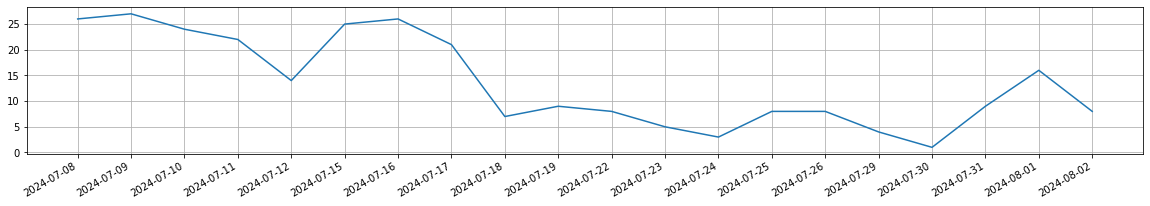

In [27]:
# gera_grafico(list_datas, d05_count)
gera_grafico(df_graficos['data'], df_graficos['qt_acoes_05'])

### Gráfico 10

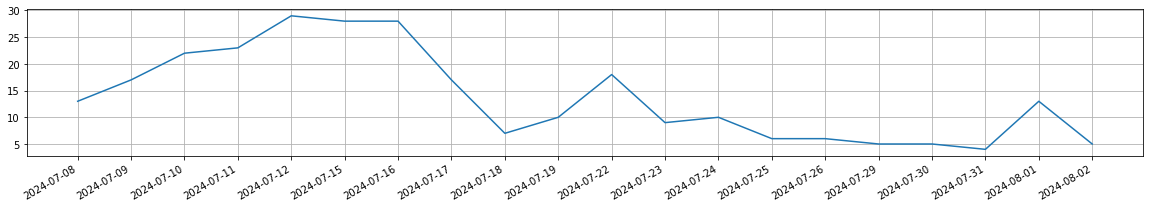

In [28]:
gera_grafico(df_graficos['data'], df_graficos['qt_acoes_10'])

### Gráfico 15

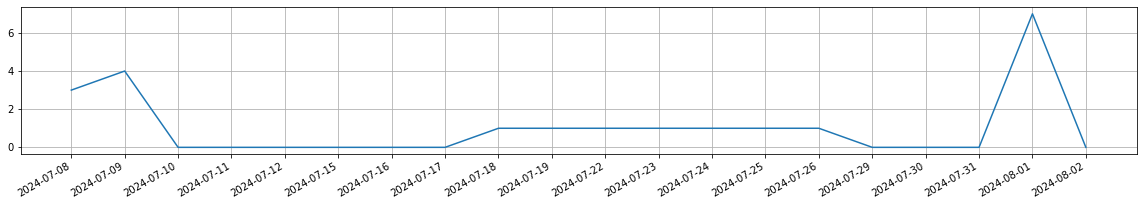

In [29]:
gera_grafico(df_graficos['data'], df_graficos['qt_acoes_15'])

### Gráfico 20

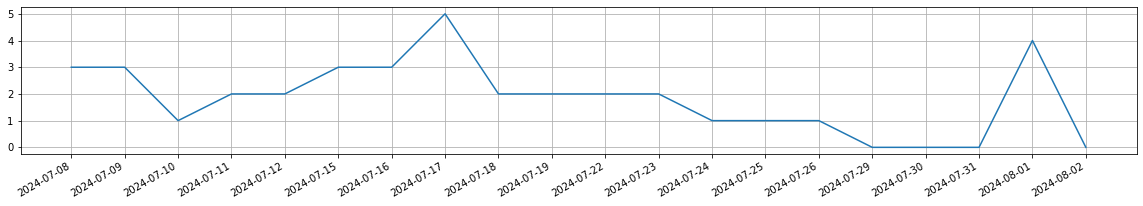

In [30]:
gera_grafico(df_graficos['data'], df_graficos['qt_acoes_20'])

### Gráfico 25

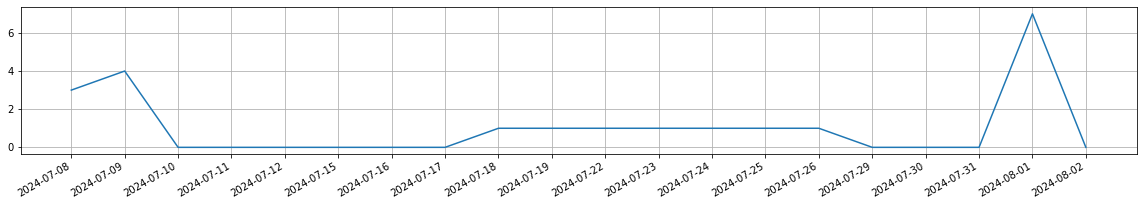

In [31]:
gera_grafico(df_graficos['data'], df_graficos['qt_acoes_25'])